In [ ]:
import numpy as np
import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.0


In [ ]:
fb = pd.read_csv('data/fb_2018.csv', index_col = 'date', parse_dates = True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [ ]:
fb.assign(
    abs_z_score_volume = lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [ ]:
fb.assign(
    volume_pct_change = fb.volume.pct_change(),
    pct_change_rank = lambda x: x.volume_pct_change.abs().rank(
        ascending = False
    )
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [ ]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [ ]:
(fb>215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [ ]:
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

In [ ]:
(fb.volume.value_counts() > 1).sum()

0

In [ ]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [ ]:
fb[volume_binned == 'high'].sort_values(
    'volume' , ascending = False
)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [ ]:
fb['2018-07-25':'2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


In [ ]:
fb['2018-03-16': '2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [ ]:
import matplotlib.pyplot as plt

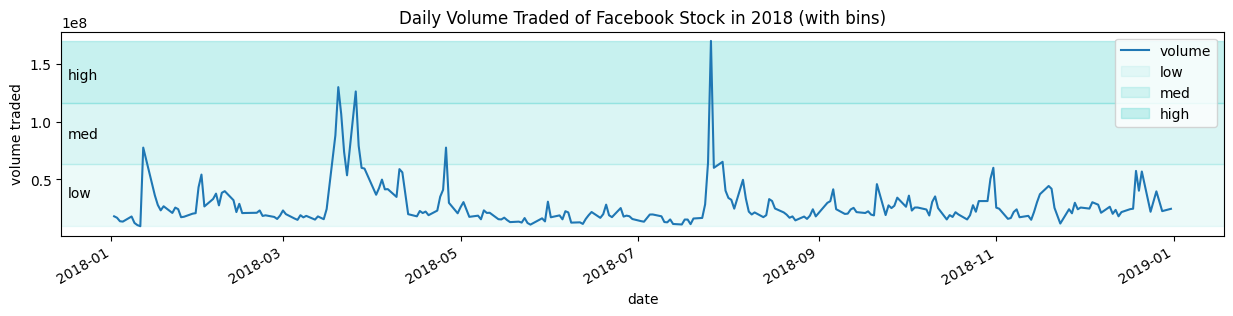

In [ ]:
fb.plot(y='volume', figsize =(15,3), title ='Daily Volume Traded of Facebook Stock in 2018 (with bins)')

for bin_name, alpha, bounds in zip(
    ['low', 'med', 'high'], [0.1, 0.2, 0.3], pd.cut(fb.volume, bins=3).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
    plt.annotate(bin_name, xy = ('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume traded')
plt.legend()
plt.show()

In [ ]:
volume_qbinned = pd.qcut(fb.volume, q =4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

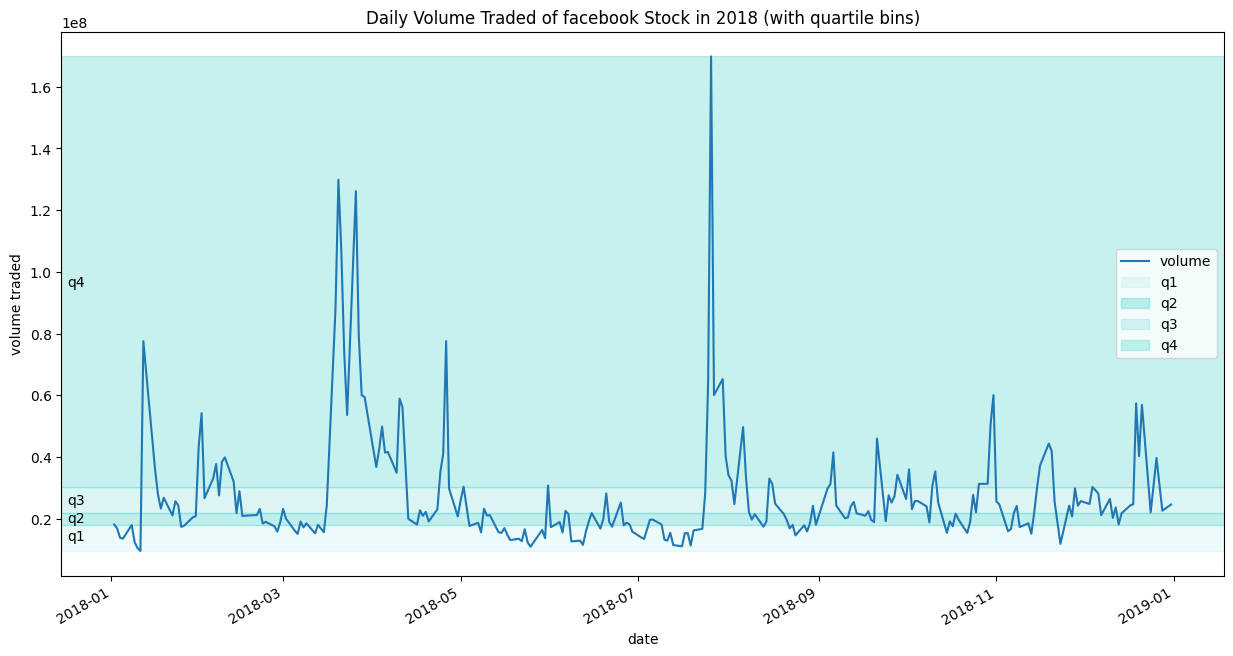

In [ ]:
fb.plot(y='volume', figsize=(15,8), title ='Daily Volume Traded of facebook Stock in 2018 (with quartile bins)')

for bin_name, alpha, bounds in zip(
    ['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.qcut(fb.volume, q=4).unique().categories.values

):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color = 'mediumturquoise')
    plt.annotate(bin_name, xy = ('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume traded')
plt.legend()
plt.show()

In [ ]:
central_park_weather = weather.query('station == "GHCND:USW00094728"'
).pivot(index='date', columns='datatype', values='value')
central_park_weather.head()


datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN


In [ ]:
central_park_weather.SNOW.clip(0,1).value_counts()

0.0    354
1.0     11
Name: SNOW, dtype: int64

##Applying Functions

In [ ]:
oct_weather_z_scores = central_park_weather.loc[
    '2018-10', ['TMIN', 'TMAX', 'PRCP']
].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,4.655774e-17,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [ ]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [ ]:
central_park_weather.loc['2018-10', 'PRCP'].describe()

count    31.000000
mean      2.941935
std       7.458542
min       0.000000
25%       0.000000
50%       0.000000
75%       1.150000
max      32.300000
Name: PRCP, dtype: float64

In [ ]:
import numpy as np

fb.apply(
    lambda x: np.vectorize(lambda y: len (str(np.ceil(y))))(x)
).astype('int64').equals(
    fb.applymap(lambda x: len(str(np.ceil(x))))
)

True

<ipython-input-38-977627aa05a0>:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in test.iteritems():


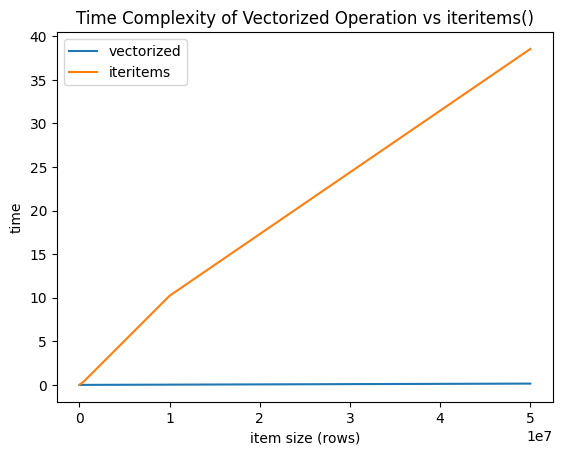

In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

vectorized_results ={}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 10000000, 50000000, 10000000]:
  test = pd.Series(np.random.uniform(size=size))

  start = time.time()
  x = test + 10
  end = time.time()
  vectorized_results[size] = end - start

  start = time.time()
  x = []
  for i, v in test.iteritems():
    x.append(v + 10)
  x = pd.Series(x)
  end = time.time()
  iteritems_results[size] = end - start

pd.DataFrame(
    [pd.Series(vectorized_results, name = 'vectorized'), pd.Series(iteritems_results , name = 'iteritems')]
).T.plot(title = 'Time Complexity of Vectorized Operation vs iteritems()')
plt.xlabel('item size (rows)')
plt.ylabel('time')
plt.show()

##Window Calculations

In [ ]:
central_park_weather['2018-10'].assign(
    rolling_PRCP = lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

<ipython-input-40-7153c5f9a0f1>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'].assign(


date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [ ]:
central_park_weather['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]

<ipython-input-41-2abb37634d3b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]


datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000
2018-10-06,0.833333,0.333333,0.0,0.0,22.033333,16.300000
2018-10-07,1.066667,0.000000,0.0,0.0,22.600000,17.400000


In [ ]:
central_park_weather['2018-10-01': '2018-10-17'].rolling('3D').agg(
    {'TMAX': 'max', 'TMIN': 'min', 'AWND':'mean', 'PRCP' : 'sum'}
).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_rolling'
).sort_index(axis=1)

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6
2018-10-08,1.8,1.133333,0.0,0.0,23.3,26.1,17.8,17.2
2018-10-09,0.3,1.066667,0.0,0.0,25.0,26.1,18.9,17.8


In [ ]:
central_park_weather.PRCP.expanding().sum().equals(central_park_weather.PRCP.cumsum())

False

In [ ]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {'TMAX': np.max, 'TMIN': np.min, 'AWND' : np.mean, 'PRCP':np.sum}
).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix = '_expanding'
).sort_index(axis=1)

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.825000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,0.980000,0.0,18.5,21.7,25.0,15.6,15.6
2018-10-06,0.5,0.900000,0.0,18.5,20.0,25.0,17.2,15.6
2018-10-07,1.1,0.928571,0.0,18.5,26.1,26.1,19.4,15.6


In [ ]:
fb.assign(
    close_ewma=lambda x: x.close.ewm(span=5).mean()
).tail(10)[['close', 'close_ewma']]

,close,close_ewma
date,,
2018-12-17,140.19,142.235433
2018-12-18,143.66,142.710289
2018-12-19,133.24,139.553526
2018-12-20,133.40,137.502350
2018-12-21,124.95,133.318234
2018-12-24,124.06,130.232156
2018-12-26,134.18,131.548104
2018-12-27,134.52,132.538736
2018-12-28,133.20,132.759157


##Pipes

In [ ]:
def get_info(df):
  return '%d rows and %d columns and max closing z-score was %d' % (*df.shape, df.close.max())

fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
    == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))

<ipython-input-58-893795aa5d88>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
<ipython-input-58-893795aa5d88>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))


True

In [ ]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(fb.rolling('20D').mean())

True

In [ ]:
pd.DataFrame.rolling(fb, '20D').mean().equals(fb.rolling('20D').mean())

True

In [ ]:
def window_calc(df, func, agg_dict, *args, **kwargs):
  """
  Run a window calculation of your choice on a DataFrame.

  Parameters:
  - df: The DataFrame to run the calculation on.
  - func: The window calculation method that takes df
  as the first argument.
  - agg_dict: Information to pass to `agg()`, could be a
  dictionary mapping the columns to the aggregation
  function to use, a string name for the function,
  or the function itself.
  - args: Positional arguments to pass to `func`.
  - kwargs: Keyword arguments to pass to `func`.
  Returns:
  - A new DataFrame object.
  """
  return df.pipe(func, *args, **kwargs).agg(agg_dict)


In [ ]:
window_calc(fb, pd.DataFrame.expanding, np.median).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


In [ ]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


In [ ]:
window_calc(
    central_park_weather['2018-10'],
    pd.DataFrame.rolling,
    {'TMAX':'max','TMIN':'min','AWND':'mean','PRCP':'sum'},
    '3D'
).head()

<ipython-input-74-86860d435151>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'],


datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0
